<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/4_chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chaos

Chaos generally refers to a state of disorder, confusion, unpredictability, or lack of order. It is a concept that has been studied in various fields, including physics, mathematics, philosophy, and biology. Here are a few contexts in which the term "chaos" is used:


### Physics and Mathematics
Physics and Mathematics: In the context of chaos theory, chaos refers to a phenomenon characterized by sensitive dependence on initial conditions. Small changes in the starting conditions of a dynamic system can lead to vastly different outcomes over time. Chaotic systems are often deterministic but exhibit unpredictable and complex behavior.

### Philosophy
Philosophy: In philosophical terms, chaos may refer to a state of primal disorder or formlessness before the creation of the universe or cosmos. It can also be used more broadly to describe a lack of order or structure.


### Popular Culture
Popular Culture: The term is sometimes used in a more colloquial sense to describe a state of confusion, disorder, or unpredictability in everyday situations. For example, one might say a room is in chaos if it's messy and disorganized.

Biology: In biology, chaos can refer to seemingly random or disordered patterns, such as the irregular beating of the heart or the behavior of certain biological systems.


### Simple summary

In scientific contexts, chaos theory explores the dynamics of nonlinear systems and how small changes in initial conditions can lead to complex and unpredictable outcomes. The study of chaos has implications in understanding weather patterns, fluid dynamics, and various other natural phenomena.

 ## Chaos Example 1

 One classic example of chaos in a simple mathematical system is the logistic map. The logistic map is a discrete-time dynamical system that exhibits chaotic behavior under certain conditions. Here's a simple Python code to visualize the chaotic behavior of the logistic map:

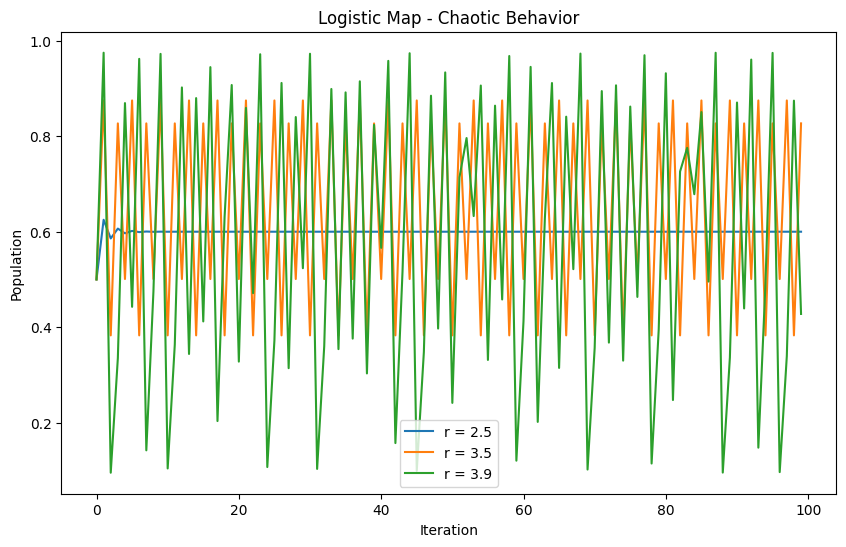

In [ ]:
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

def generate_logistic_map_sequence(x0, r, n):
    sequence = [x0]
    for _ in range(n - 1):
        xn = logistic_map(sequence[-1], r)
        sequence.append(xn)
    return sequence

# Parameters
x0 = 0.5  # Initial condition
r_values = [2.5, 3.5, 3.9]  # Different values of the parameter 'r'
n = 100  # Number of iterations

# Generate and plot logistic map sequences
plt.figure(figsize=(10, 6))
for r in r_values:
    sequence = generate_logistic_map_sequence(x0, r, n)
    plt.plot(sequence, label=f'r = {r}')

plt.title('Logistic Map - Chaotic Behavior')
plt.xlabel('Iteration')
plt.ylabel('Population')
plt.legend()
plt.show()

In this example, the logistic map represents a population model, where x is the population at a given time, and r is a parameter controlling the growth rate. The logistic_map function calculates the next population based on the logistic map equation. The code then generates sequences for different values of the parameter 'r' and plots the population evolution over iterations.

You'll observe that for certain values of 'r' (e.g., 3.5 and 3.9), the population sequence exhibits chaotic behavior, with seemingly random and unpredictable patterns. This is a simple illustration of chaos in a mathematical system.

## Chaos Example 2

Let's consider a simple physics example: the motion of a pendulum. The motion of a simple pendulum is governed by the laws of physics, specifically the equations of motion derived from Newton's laws. Here's a Python code snippet to simulate and visualize the motion of a simple pendulum:

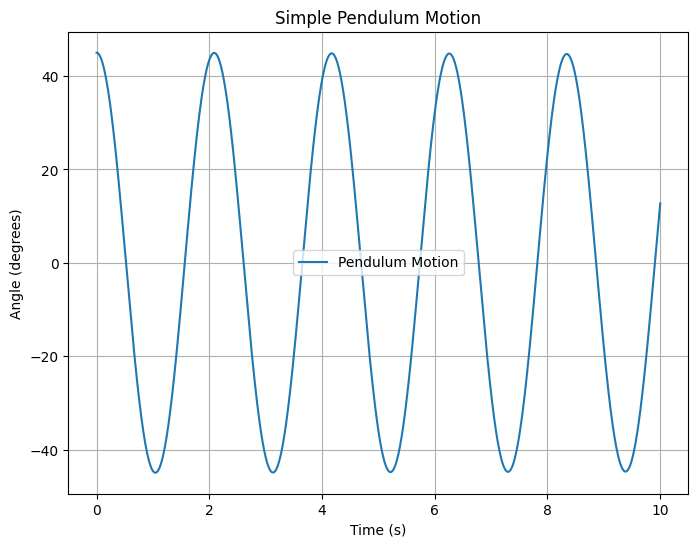

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Function representing the differential equations for a simple pendulum
def pendulum_equations(t, y, l, g):
    theta, omega = y
    dydt = [omega, -(g / l) * np.sin(theta)]
    return dydt

# Parameters
length = 1.0  # Length of the pendulum
gravity = 9.8  # Acceleration due to gravity

# Initial conditions
initial_theta = np.radians(45.0)  # Initial angle in radians
initial_omega = 0.0  # Initial angular velocity

initial_state = [initial_theta, initial_omega]

# Time span for the simulation
t_span = (0, 10)  # Simulate for 10 seconds

# Solve the differential equations using solve_ivp
solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

# Extracting results
theta_values = solution.y[0]
time_values = solution.t

# Plotting the motion of the pendulum
plt.figure(figsize=(8, 6))
plt.plot(time_values, np.degrees(theta_values), label='Pendulum Motion')
plt.title('Simple Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()

In this example, the pendulum_equations function defines the system of ordinary differential equations that describe the motion of a simple pendulum. The code then uses the solve_ivp function from the scipy library to numerically solve these equations and simulate the motion over time.

The resulting plot shows the angle of the pendulum as it swings back and forth. The motion of a simple pendulum is periodic and can be described using trigonometric functions, but for larger initial angles or more complex pendulum systems, chaotic behavior can emerge.

## add initial little difference condition

To introduce chaos into the motion of a simple pendulum, we can make a slight modification to the initial conditions. Chaos often arises when the system is sensitive to initial conditions, and in the context of a pendulum, this sensitivity can be explored by starting with very close initial conditions but slightly varying one of them.

Here's an updated version of the code with an additional pendulum simulation starting with a very slightly different initial angle:

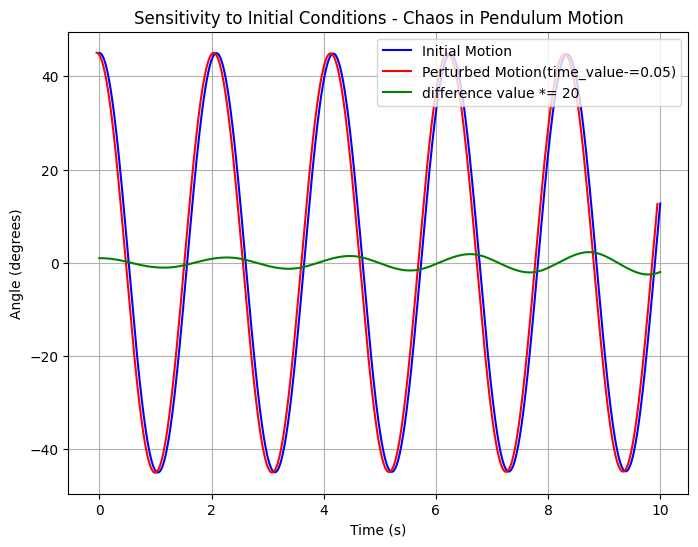

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def pendulum_equations(t, y, l, g):
    theta, omega = y
    dydt = [omega, -(g / l) * np.sin(theta)]
    return dydt

length = 1.0
gravity = 9.8

# Initial conditions
initial_theta = np.radians(45.0)
initial_omega = 0.0
initial_state = [initial_theta, initial_omega]

# Slightly different initial condition to explore sensitivity
perturbed_initial_theta = initial_theta + np.radians(0.05)
perturbed_initial_state = [perturbed_initial_theta, initial_omega]

# Time span for the simulation
t_span = (0, 10)

# Solve the differential equations for both initial conditions
solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

perturbed_solution = solve_ivp(
    lambda t, y: pendulum_equations(t, y, length, gravity),
    t_span,
    perturbed_initial_state,
    t_eval=np.linspace(t_span[0], t_span[1], 1000),
)

# Extracting results
theta_values = solution.y[0]
perturbed_theta_values = perturbed_solution.y[0]
time_values = solution.t

#print("o:",theta_values," p:",perturbed_theta_values)


# Plotting the motion of the pendulum for both initial conditions
plt.figure(figsize=(8, 6))
plt.plot(time_values, np.degrees(theta_values), label='Initial Motion', color='blue')
plt.plot(time_values-0.05, np.degrees(perturbed_theta_values), label='Perturbed Motion(time_value-=0.05)', color='red')
plt.plot(time_values, (np.degrees(perturbed_theta_values)-np.degrees(theta_values))*20, label='difference value *= 20', color='green')
plt.title('Sensitivity to Initial Conditions - Chaos in Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()



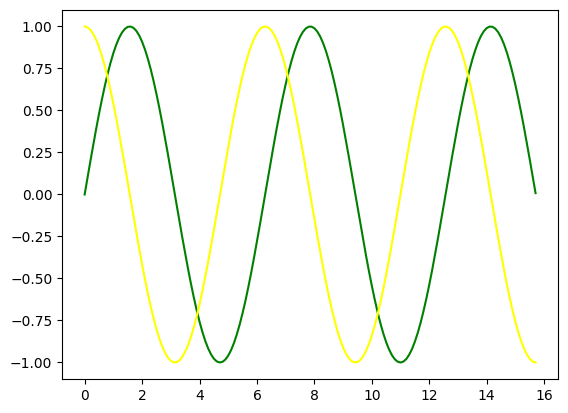

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


length = 1.0
gravity = 9.8

x = np.arange(0, 5*np.pi, 0.1)
y = np.sin(x)
yy = np.cos(x)
plt.plot(x, y, color='green')
plt.plot(x, yy, color='yellow')
plt.show()

